In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import pydicom.uid
import scipy.ndimage
%matplotlib inline

In [13]:
c_adc = dicom.read_file('dwi\\cDWI_ADC.dcm')
z_adc = dicom.read_file('dwi\\zDWI_ADC.dcm')

In [14]:
c_adc_position = c_adc.ImagePositionPatient
c_adc_pixelspacing = np.array(c_adc.PixelSpacing)
c_adc_image = c_adc.pixel_array

z_adc_position = z_adc.ImagePositionPatient
z_adc_pixelspacing = np.array(z_adc.PixelSpacing)
z_adc_image = z_adc.pixel_array

In [15]:
def resize(image, spacing, new_spacing=[0.5,0.5]):
    
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    new_image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return new_image

In [16]:
new_c_adc_image = resize(c_adc_image, c_adc_pixelspacing , new_spacing=[0.5,0.5])
new_z_adc_image = resize(z_adc_image, z_adc_pixelspacing , new_spacing=[0.5,0.5])

In [17]:
Displacement = [int(z_adc_position[0]) - int(c_adc_position[0]), int(z_adc_position[1]) - int(c_adc_position[1])]

In [18]:
img_size = new_z_adc_image.shape

In [19]:
crop_c_adc = new_c_adc_image[Displacement[0]*2:Displacement[0]*2+img_size[0],Displacement[1]*2:Displacement[1]*2+img_size[1]]

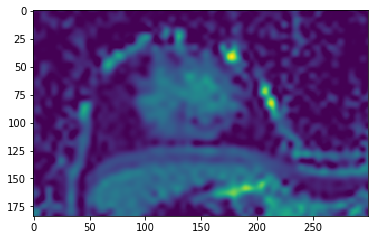

In [20]:
plt.imshow(crop_c_adc)

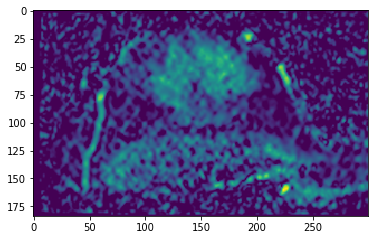

In [21]:
plt.imshow(new_z_adc_image)